`Local Outlier Factor (LOF)` is an unsupervised anomaly detection method. <br>
It computes the local density deviation of a given data point with respect to its neighbours. It considers an outliers from a sample if data point have a substantially lower density than their neighbours

`Outlier Detection with LOF`

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.neighbors import LocalOutlierFactor 

In [20]:
np.random.seed(42)

#Generate train data 

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers -2]

#generate some outliers 
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

In [22]:
n_outliers = len(X_outliers)
n_outliers

20

In [24]:
groud_truth = np.ones(len(X), dtype=int)
groud_truth[-n_outliers:] = -1

In [25]:
#Fitting the model for outlier detection 

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [26]:
#computing the predicted labels 

y_pred = clf.fit_predict(X)
n_errors = (y_pred != groud_truth).sum()
X_scores = clf.negative_outlier_factor_

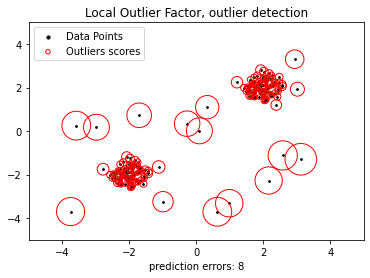

In [27]:
#Visualization
plt.title("Local Outlier Factor, outlier detection")
plt.scatter(X[:,0], X[:,1], color="k", s = 3.0, label="Data Points")

#plot circles with radius proportional to the outliers scores 

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:,1],
    s = 1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outliers scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### `Novelty Detection with LOF`

In [8]:
#Generating data 

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

#generating normal training observations 

X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X+2, X-2]

#generating test normal observations 

X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X+2, X-2]

#Generating some novel observation 
X_outliers = np.random.uniform(low=-4, high=4, size=(20,2))

In [9]:
#Fitting the model for novelty detection 

clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)

LocalOutlierFactor(contamination=0.1, novelty=True)

when LOF is used for novelty detection one MUST not use predict, decision_function and score_samples on the training set as this would lead to wrong results. <br>
Only can be used on unseen data, e.g, X_test, or X_outliers, or meshgrid

In [10]:
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [11]:
n_error_test = y_pred_test[y_pred_test == -1].size 
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [12]:
#Plotting the lerned frontier, the points, and the nearest vectors on the plane

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

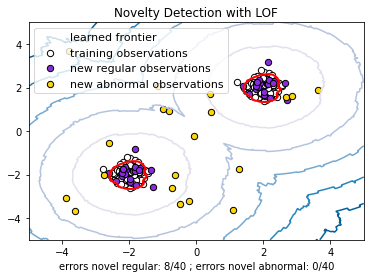

In [18]:
plt.title("Novelty Detection with LOF")
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="red")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers)
)
plt.show()